## Anita Soroush 

This notebook is a short exploration in New York City airbnb dataset

Dataset link : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [10]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [11]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/AB_NYC_2019.csv')

In [12]:
data.shape

(48895, 16)

In [ ]:
data.info

# cleaning

In [14]:
data.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [16]:
data = data.dropna()

In [17]:
data.duplicated().any()

False

In [20]:
data.shape

(38821, 16)

# Exploration

In [24]:
def mean_reviews_in_neighborhood (neighborhood_name):
    neigh_hosts = data[data["neighbourhood_group"] == neighborhood_name]
    neigh_hosts_mean_num_of_reviews = neigh_hosts["number_of_reviews"].mean()
    return neigh_hosts_mean_num_of_reviews

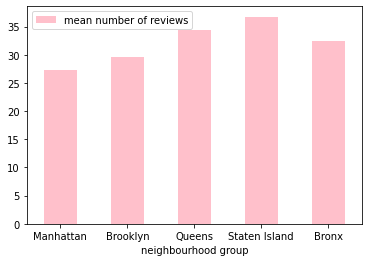

In [27]:
# plotting a barchart of mean reviews in each neighborhood group

neigh_review_df = pd.DataFrame(
    {'neighbourhood group': ['Manhattan',
                             'Brooklyn',
                             'Queens',
                             "Staten Island",
                             "Bronx"],
    'mean number of reviews': [mean_reviews_in_neighborhood ('Manhattan'),
                               mean_reviews_in_neighborhood ('Brooklyn'),
                               mean_reviews_in_neighborhood ('Queens'),
                               mean_reviews_in_neighborhood ('Staten Island'),
                               mean_reviews_in_neighborhood ('Bronx')]})

neigh_review_df.plot.bar(x='neighbourhood group', y='mean number of reviews', rot=0, color="pink")

In [26]:
def mean_price_in_neighborhood (neighborhood_name):
    neigh_hosts = data[data["neighbourhood_group"] == neighborhood_name]
    neigh_hosts_mean_price = neigh_hosts["price"].mean()
    return neigh_hosts_mean_price

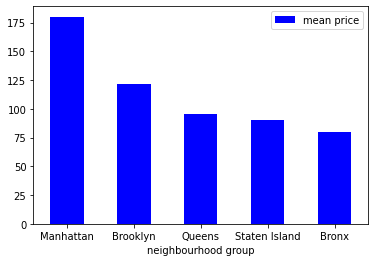

In [28]:
# plotting a barchart of mean price in each neighborhood group

neigh_price_df = pd.DataFrame(
    {'neighbourhood group': ['Manhattan',
                             'Brooklyn',
                             'Queens',
                             "Staten Island",
                             "Bronx"],
    'mean price': [mean_price_in_neighborhood ('Manhattan'),
                   mean_price_in_neighborhood ('Brooklyn'),
                   mean_price_in_neighborhood ('Queens'),
                   mean_price_in_neighborhood ('Staten Island'),
                   mean_price_in_neighborhood ('Bronx')]})

neigh_price_df.plot.bar(x='neighbourhood group', y='mean price', rot=0, color="blue")

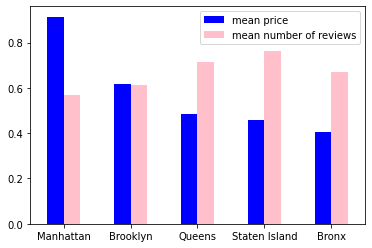

In [29]:
# mean num of reviews vs mean price in each neighborhood group

price_std = data["price"].std()
num_of_reviews_std = data["number_of_reviews"].std()

mean_price = [mean_price_in_neighborhood ('Manhattan')/price_std,
              mean_price_in_neighborhood ('Brooklyn')/price_std,
              mean_price_in_neighborhood ('Queens')/price_std,
              mean_price_in_neighborhood ('Staten Island')/price_std,
              mean_price_in_neighborhood ('Bronx')/price_std]
mean_num_of_reviews = [mean_reviews_in_neighborhood ('Manhattan')/num_of_reviews_std,
                       mean_reviews_in_neighborhood ('Brooklyn')/num_of_reviews_std,
                       mean_reviews_in_neighborhood ('Queens')/num_of_reviews_std,
                       mean_reviews_in_neighborhood ('Staten Island')/num_of_reviews_std,
                       mean_reviews_in_neighborhood ('Bronx')/num_of_reviews_std]

index = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
data_frame = pd.DataFrame({'mean price': mean_price,
                            'mean number of reviews': mean_num_of_reviews}, index=index)
data_frame.plot.bar(rot=0, color={'mean price': "blue", 'mean number of reviews': "pink"})

Statistical Test:

In [30]:
# correlation of price and review (all but Bronx)
print("correlation of price and review:  ", data["price"].corr(data["number_of_reviews"]))

correlation of price and review:   -0.035924415903374675


In [32]:
def room_type_preference():
    private_rooms = data[data["room_type"] == "Private room"]
    mean_views_of_private_rooms = private_rooms["number_of_reviews"].mean()
    private_room_mean_price = private_rooms["price"].mean()
    print("mean views of private rooms: ", mean_views_of_private_rooms,
          "\nmean price of a private room: ", private_room_mean_price)

    entire_homes = data[data["room_type"] == "Entire home/apt"]
    mean_views_of_entire_homes = entire_homes["number_of_reviews"].mean()
    entire_home_mean_price = entire_homes["price"].mean()
    print("\nmean views of entire homes: ", mean_views_of_entire_homes,
          "\nmean price of an entire home: ", entire_home_mean_price)

In [33]:
room_type_preference()

mean views of private rooms:  30.472697405687097 
mean price of a private room:  83.98527245949926

mean views of entire homes:  28.534816199990157 
mean price of an entire home:  196.3159293341863
